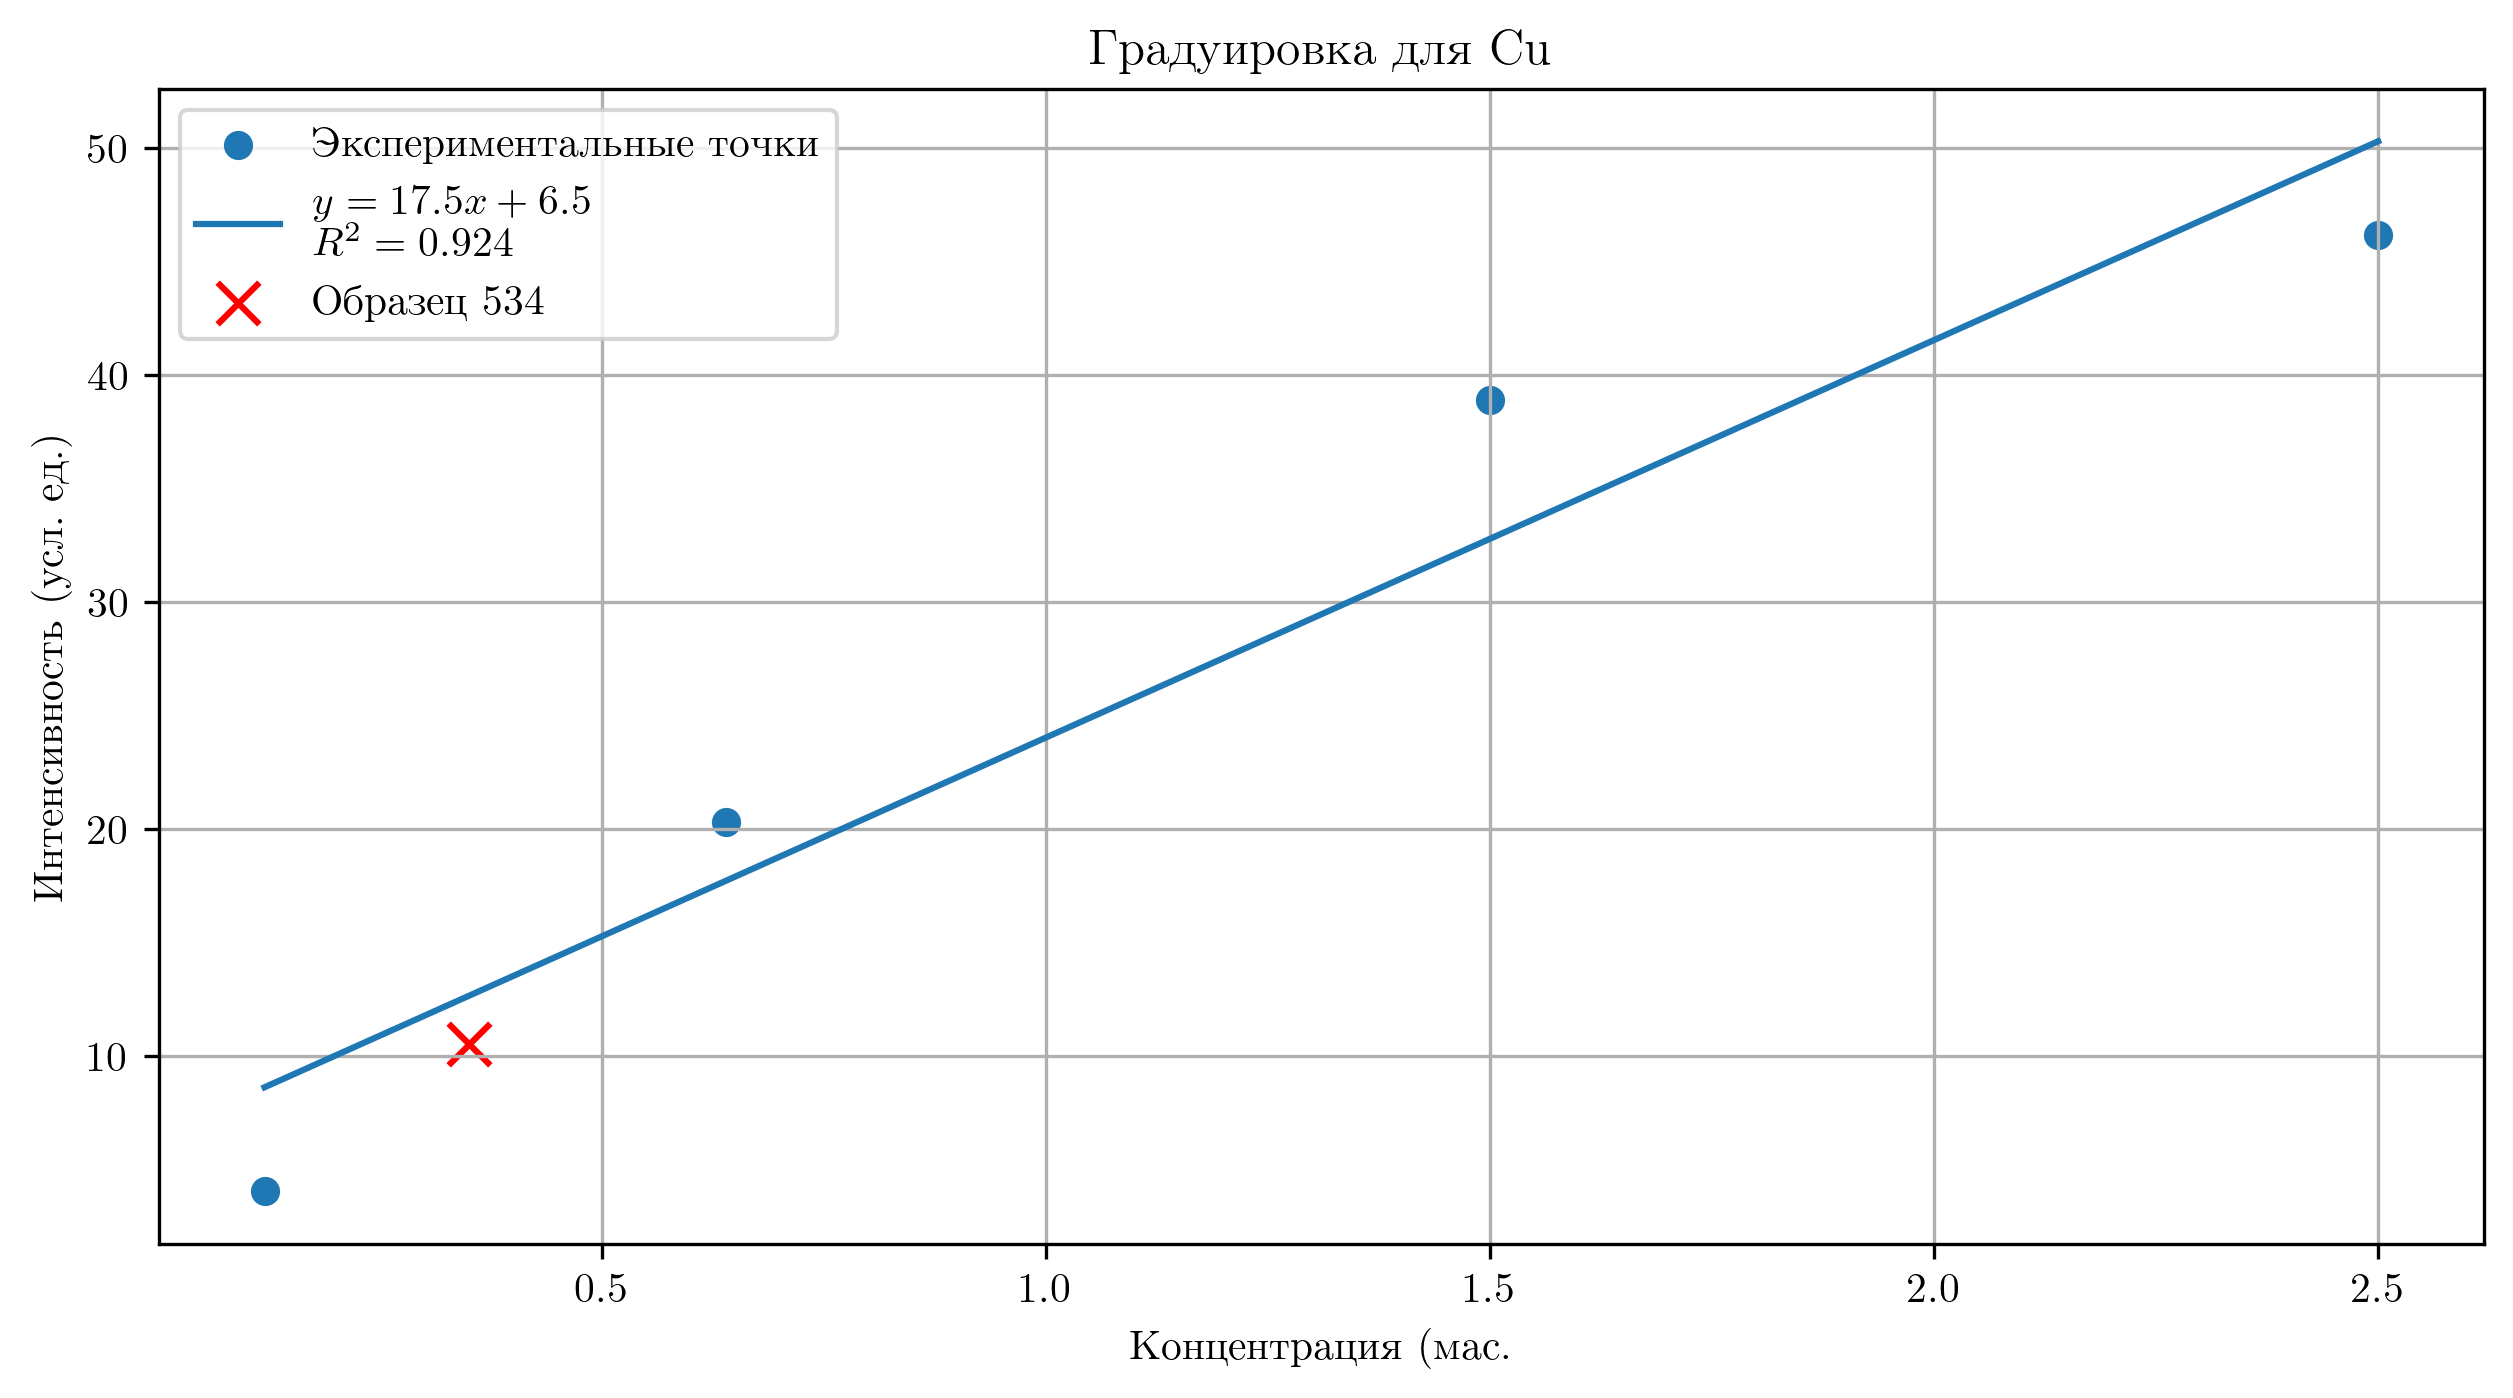

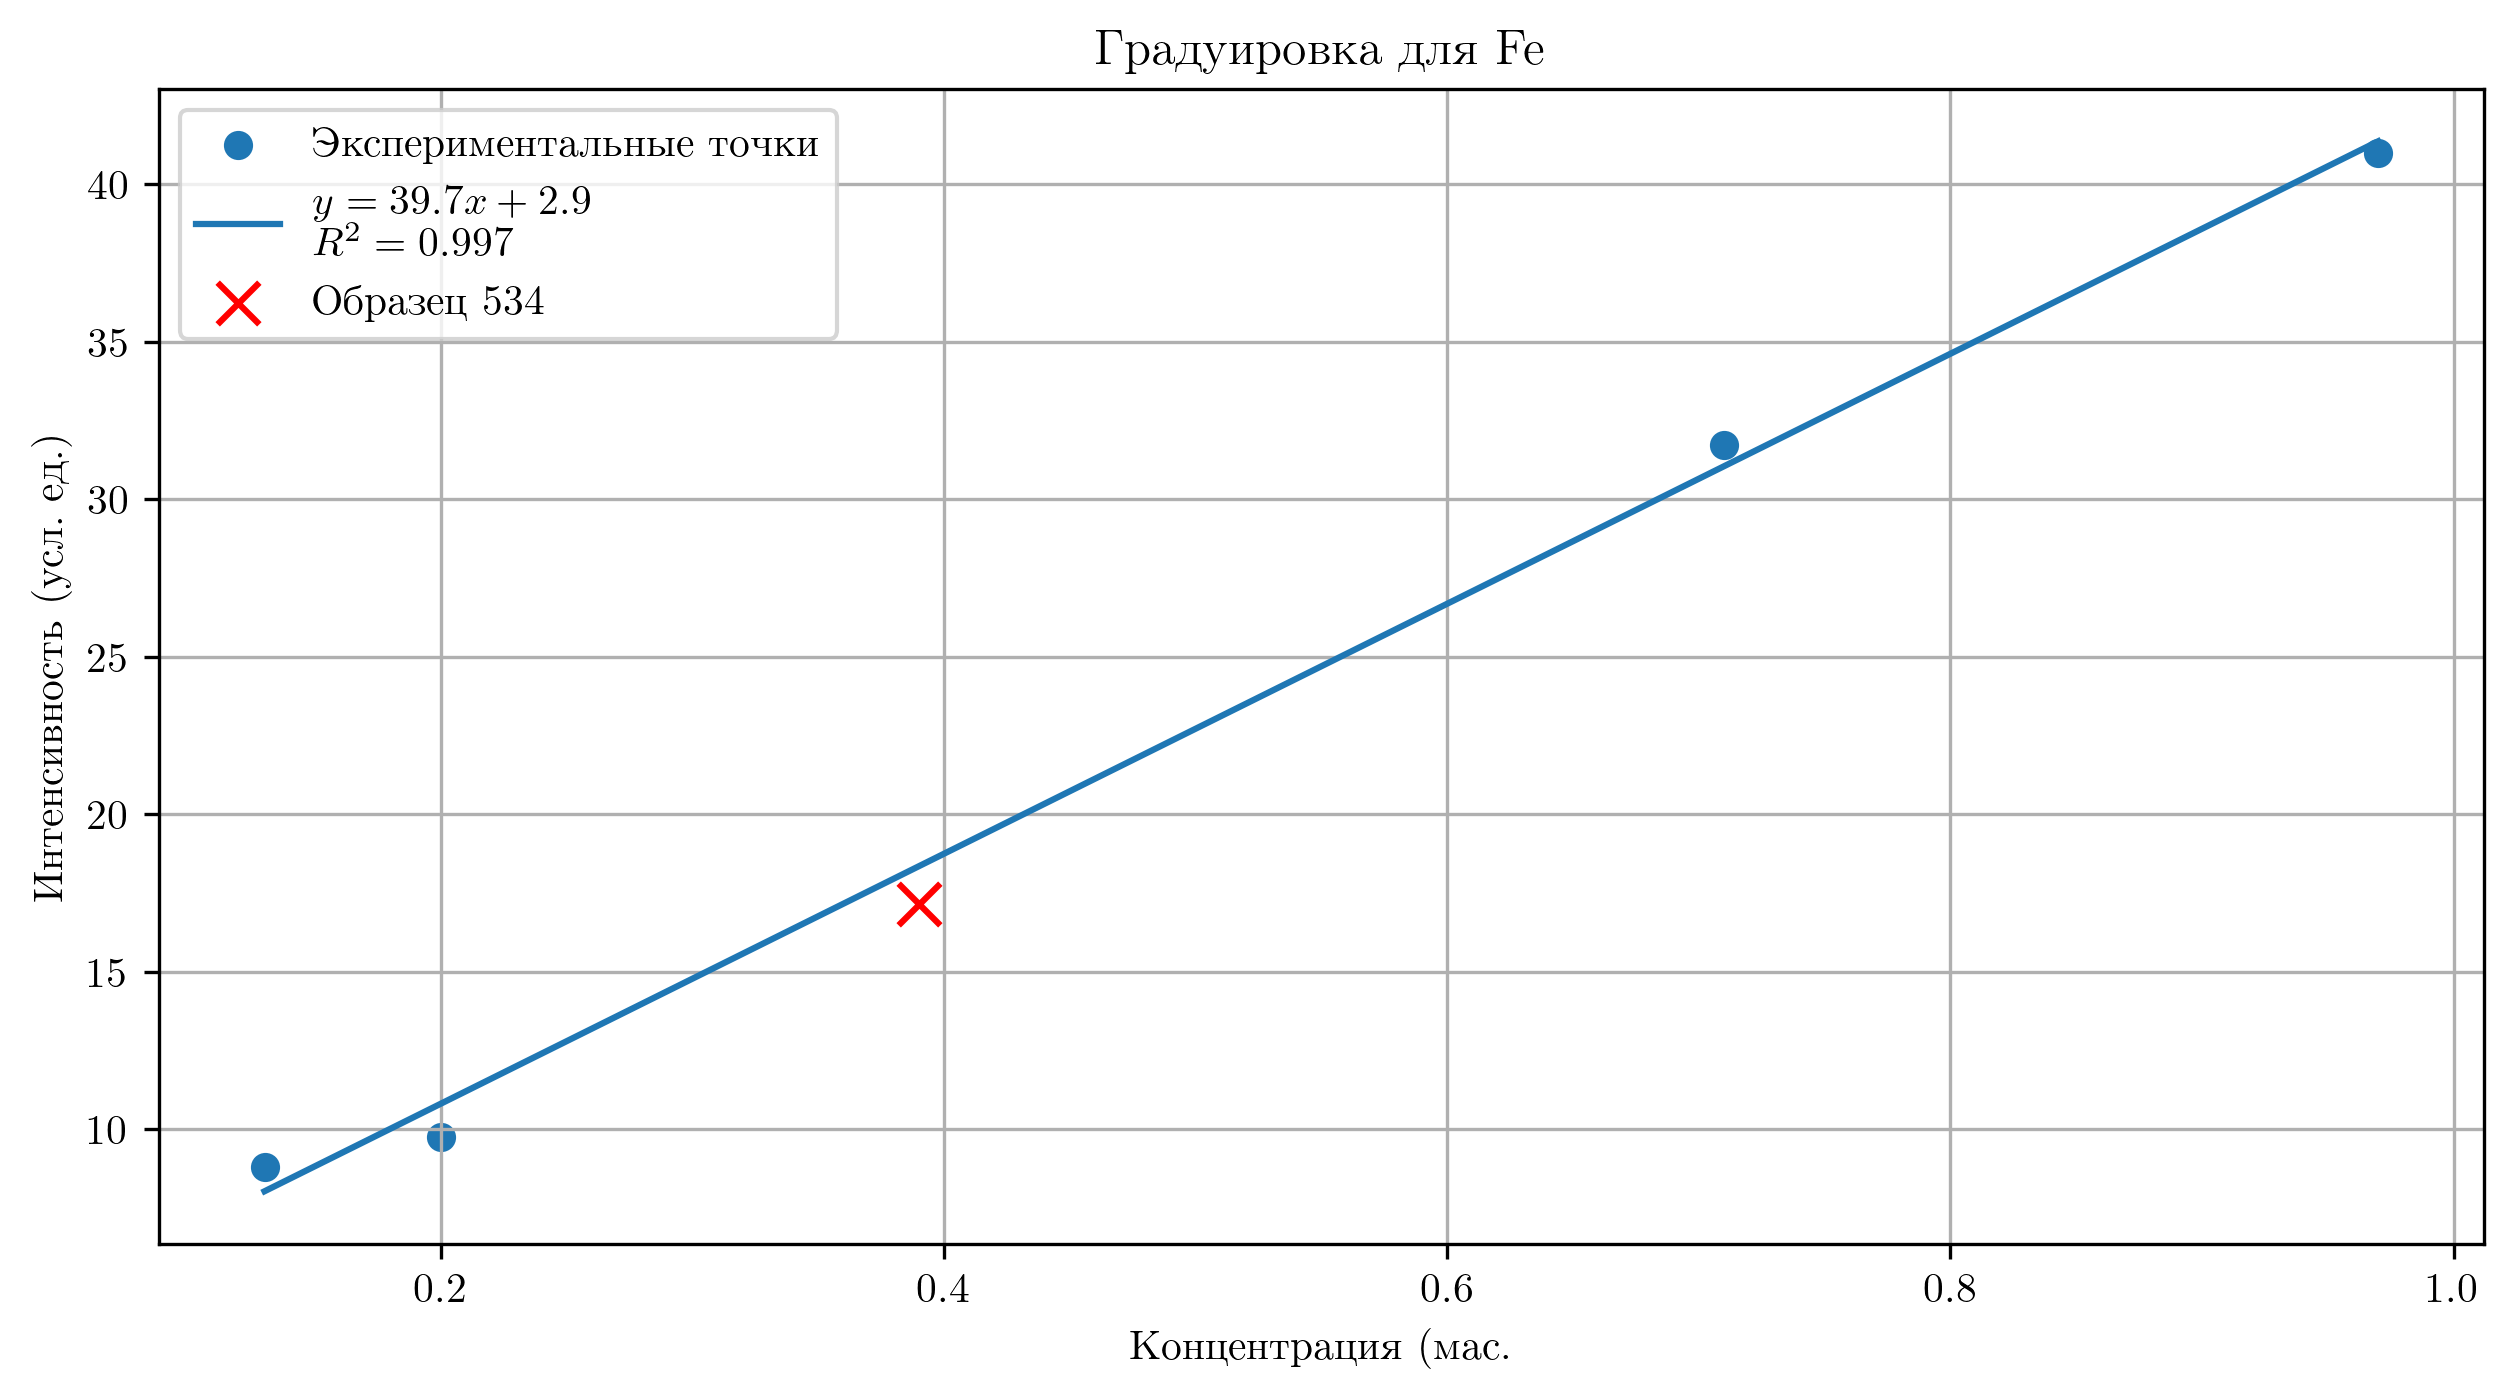

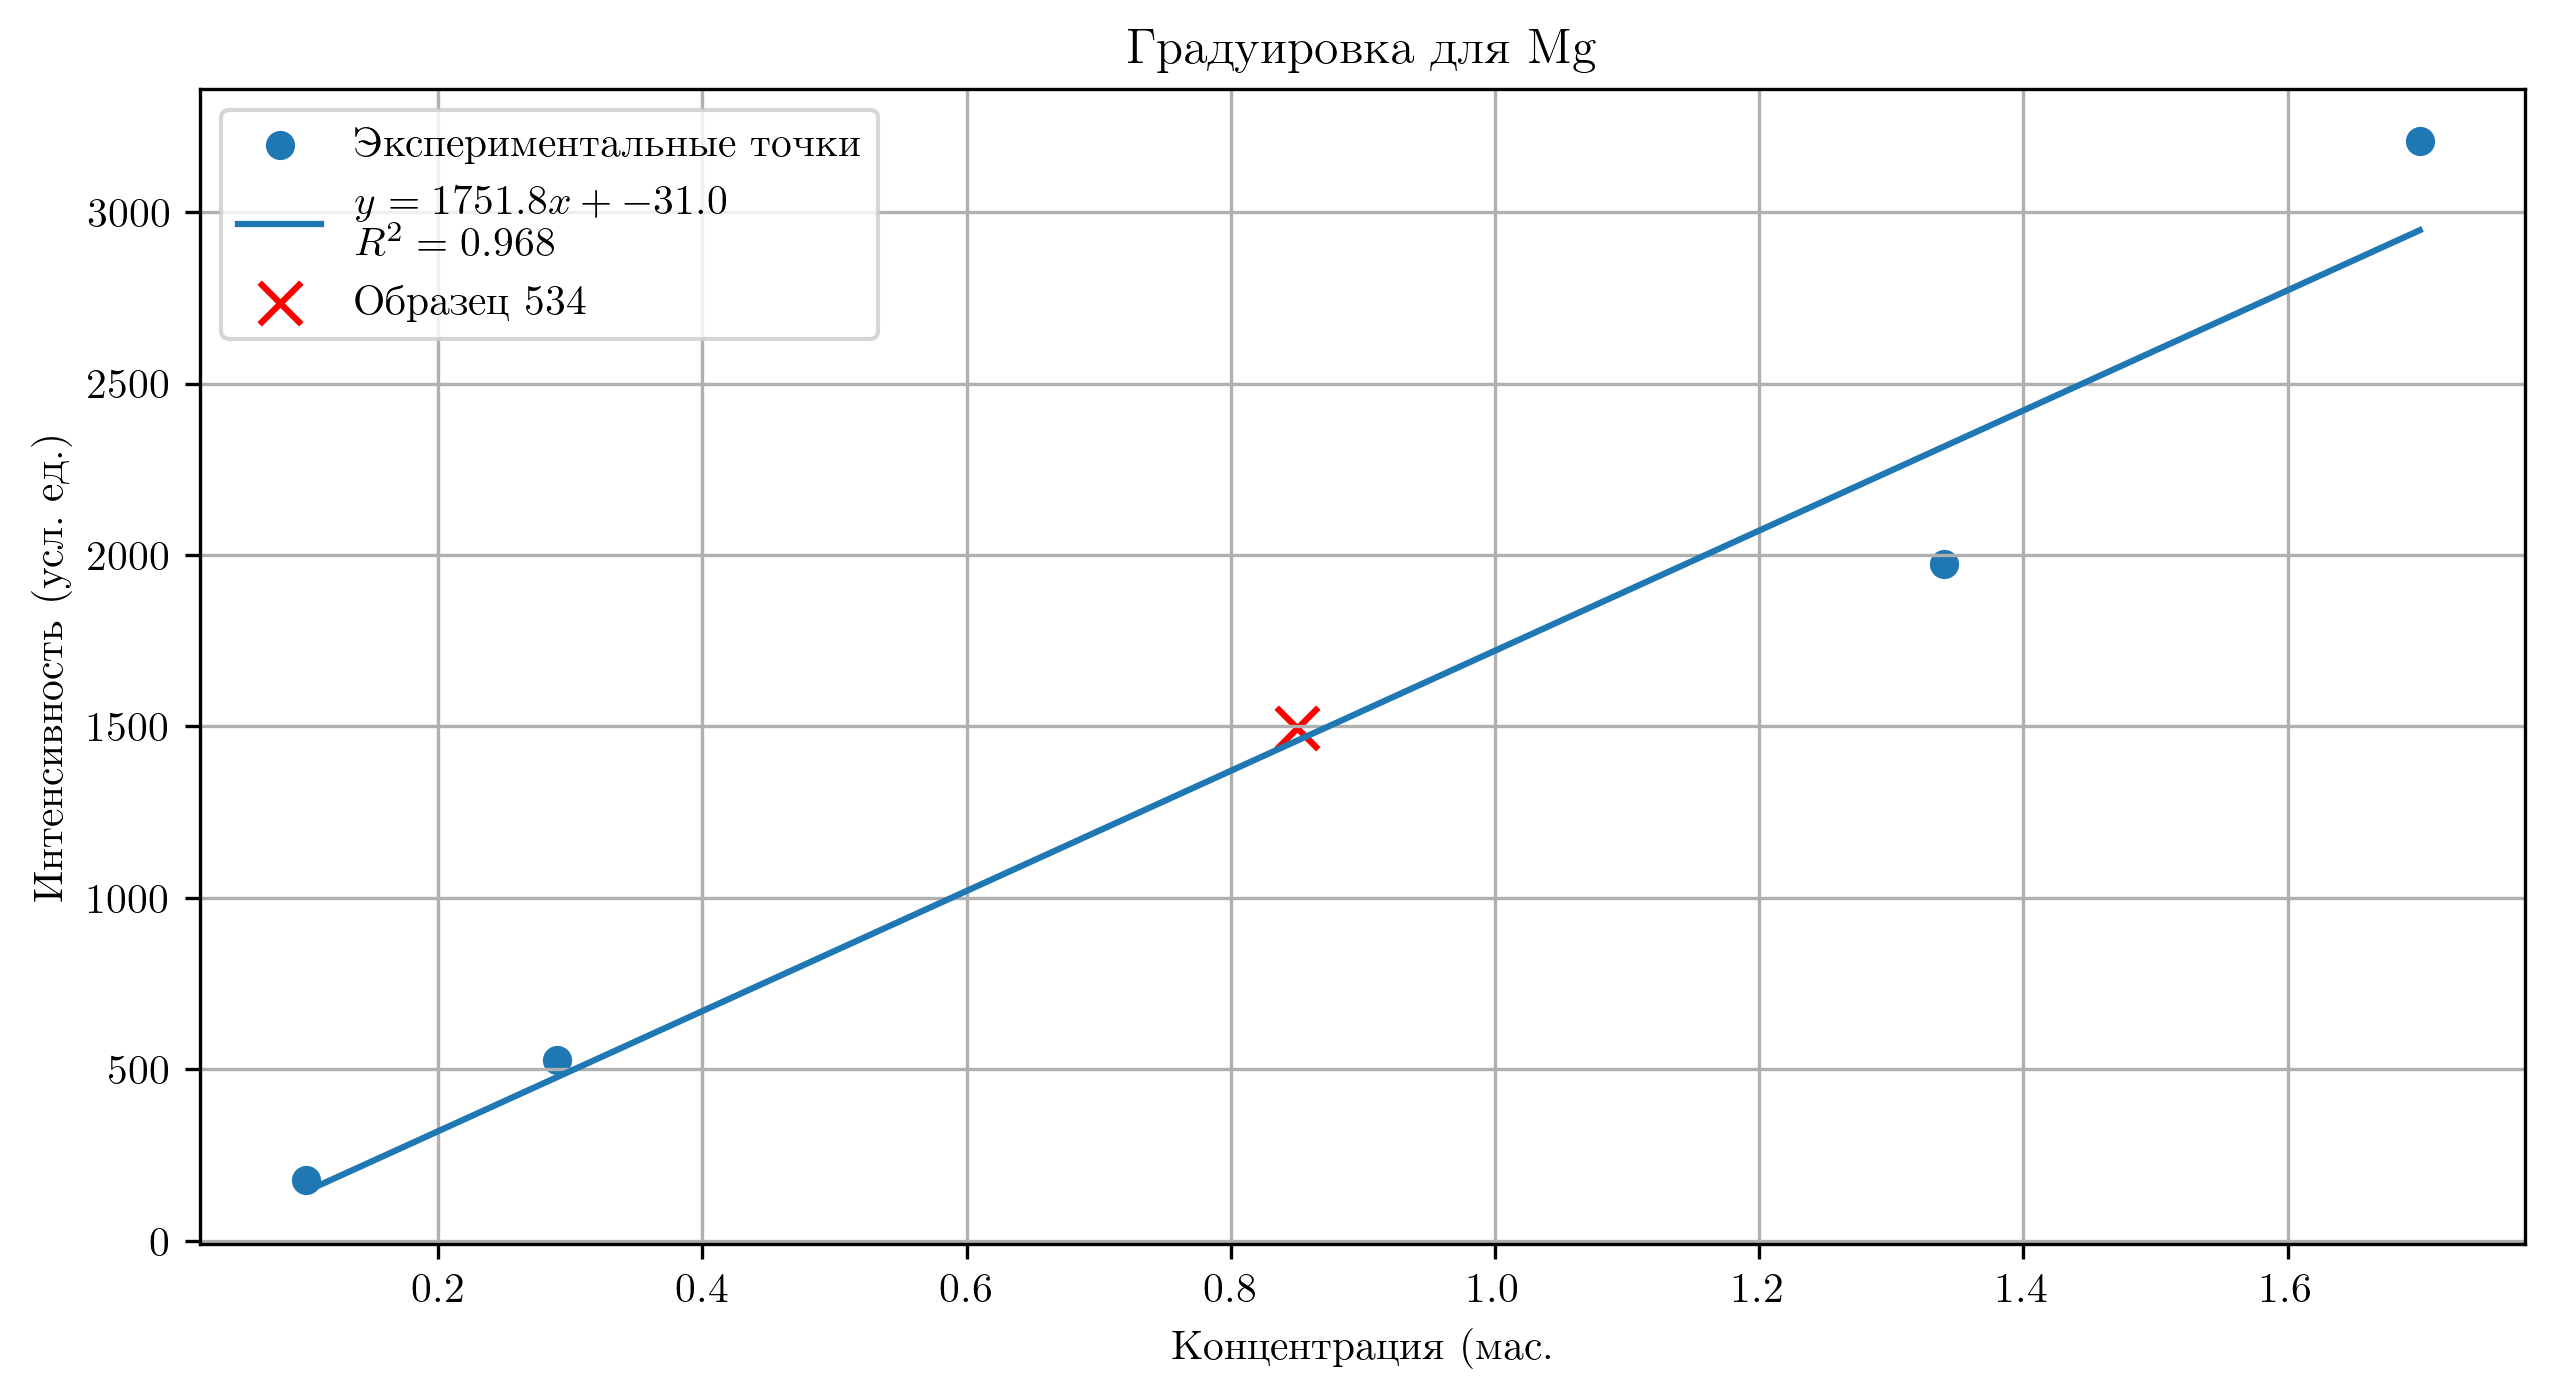

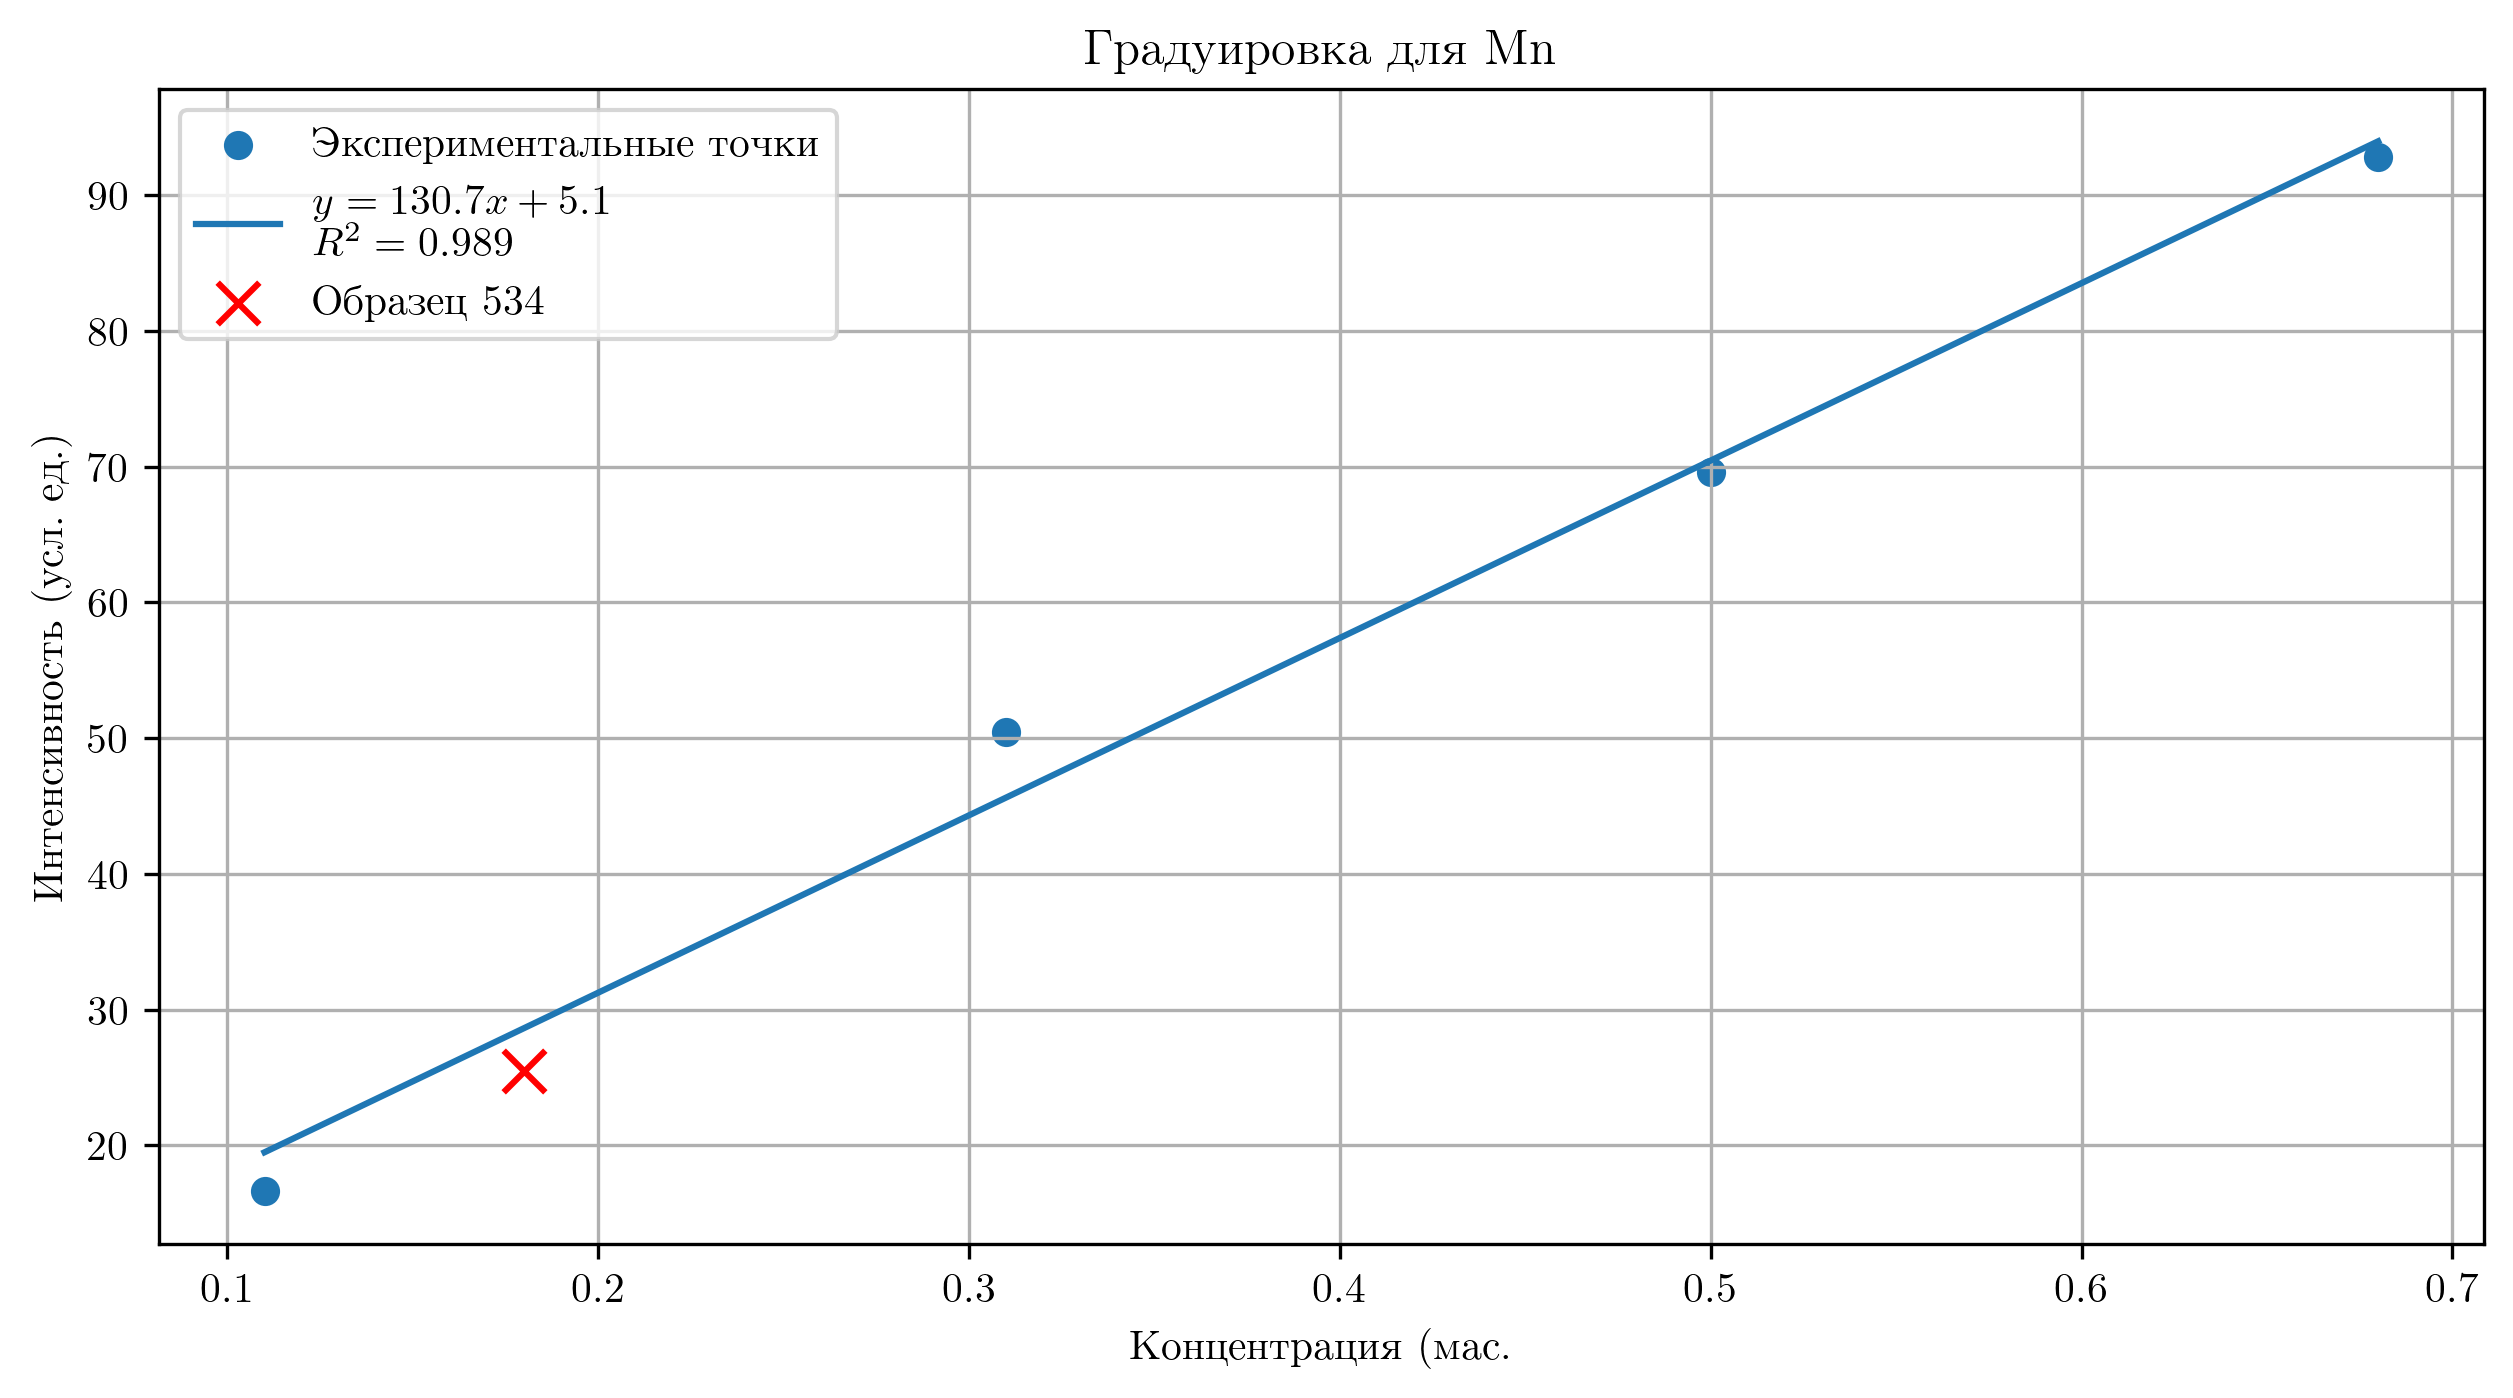

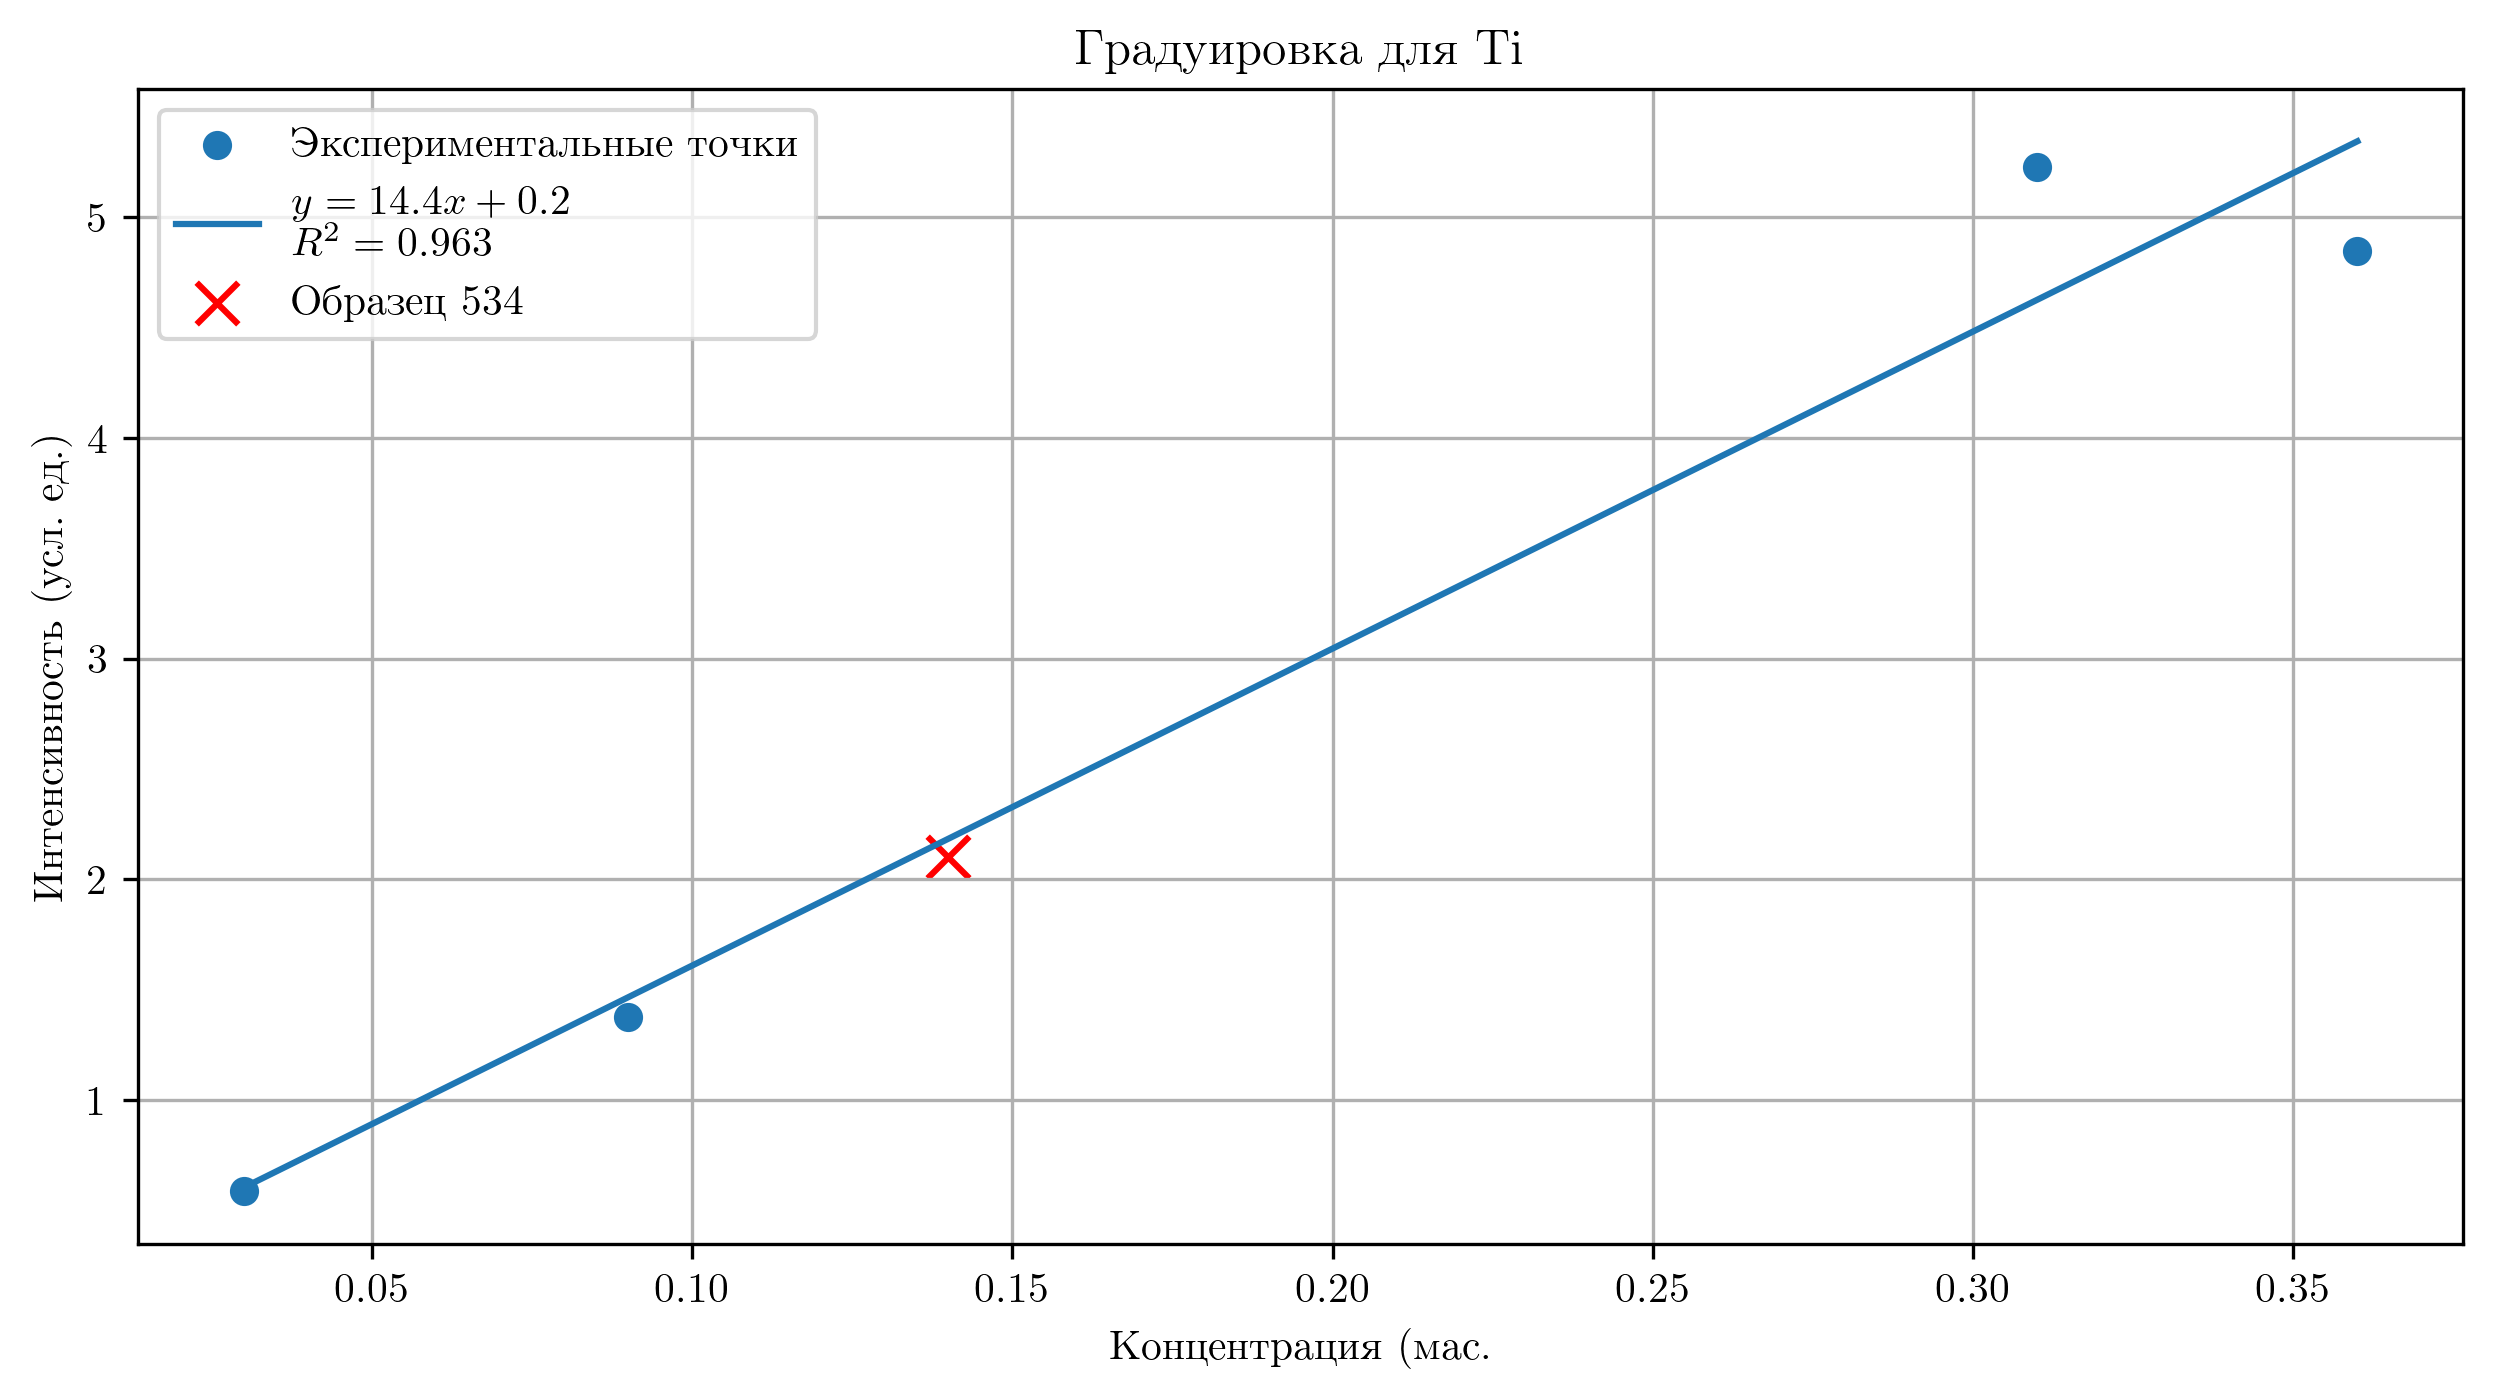

,Element,a,b,sigma_y,R2,Conc_pred (%),Conc_act (%),Error_fit (%),Bias (%)
0,Cu,17.520494,6.500862,6.409144,0.924124,0.229549,0.35,0.365808,-0.120451
1,Fe,39.690124,2.872921,1.074671,0.997028,0.359604,0.39,0.027077,-0.030396
2,Mg,1751.838763,-31.036406,306.970209,0.967677,0.871115,0.85,0.175227,0.021115
3,Mn,130.654171,5.124623,4.089830,0.989265,0.156000,0.18,0.031303,-0.024000
4,Ti,14.358182,0.173592,0.555288,0.963371,0.134145,0.14,0.038674,-0.005855


In [17]:
# ... (предыдущий код без изменений)

results = []
for el in ['Cu','Fe','Mg','Mn','Ti']:
    x = calib[el+'_conc'].values
    y = calib[el+'_int'].values
    
    # Регрессия
    a, b = np.polyfit(x, y, 1)
    y_pred = a*x + b
    resid = y - y_pred
    
    # Расчет R²
    SS_res = np.sum(resid**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - (SS_res / SS_tot) if SS_tot != 0 else 0  # Защита от деления на ноль
    
    # Остаточная ошибка
    sigma_y = np.sqrt(SS_res / (len(x)-2))
    
    # Предсказание для образца 534
    I_534 = df.loc[534, el+'_int']
    conc_pred = (I_534 - b)/a
    conc_err = sigma_y / abs(a)
    
    results.append({
        'Element': el,
        'a': a,
        'b': b,
        'sigma_y': sigma_y,
        'R2': R2,
        'Conc_pred (%)': conc_pred,
        'Conc_act (%)': conc[534][el],
        'Error_fit (%)': conc_err,
        'Bias (%)': conc_pred - conc[534][el]
    })
    
    # Обновленный график с R²
    plt.figure(figsize=(10,5), dpi=300)
    plt.scatter(x, y, label='Экспериментальные точки')
    lin_x = np.linspace(x.min(), x.max(), 100)
    plt.plot(lin_x, a*lin_x + b, label=f'$y = {a:.1f}x + {b:.1f}$\n$R^2 = {R2:.3f}$')
    plt.scatter(conc[534][el], I_534, marker='x', color='red', s=100, label='Образец 534')
    plt.title(f'Градуировка для {el}')
    plt.xlabel('Концентрация (мас. %)')
    plt.ylabel('Интенсивность (усл. ед.)')
    plt.legend()
    plt.grid()
    plt.savefig(f"images/AS_{el}.png")
    plt.show()

# Итоговая таблица
result_df = pd.DataFrame(results)
display.display(result_df)

<>:91: SyntaxWarning: invalid escape sequence '\l'
<>:91: SyntaxWarning: invalid escape sequence '\l'
<>:92: SyntaxWarning: invalid escape sequence '\l'
<>:93: SyntaxWarning: invalid escape sequence '\l'
<>:91: SyntaxWarning: invalid escape sequence '\l'
<>:91: SyntaxWarning: invalid escape sequence '\l'
<>:92: SyntaxWarning: invalid escape sequence '\l'
<>:93: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_97521/1884461907.py:91: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Калибровка для {el}: $\lg(I_{{ан}}/I_{{ср}}) = a_0 + a_1 \lg c$')
/tmp/ipykernel_97521/1884461907.py:91: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Калибровка для {el}: $\lg(I_{{ан}}/I_{{ср}}) = a_0 + a_1 \lg c$')
/tmp/ipykernel_97521/1884461907.py:92: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lg c$')
/tmp/ipykernel_97521/1884461907.py:93: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lg(I_{ан}/I_{ср})$')


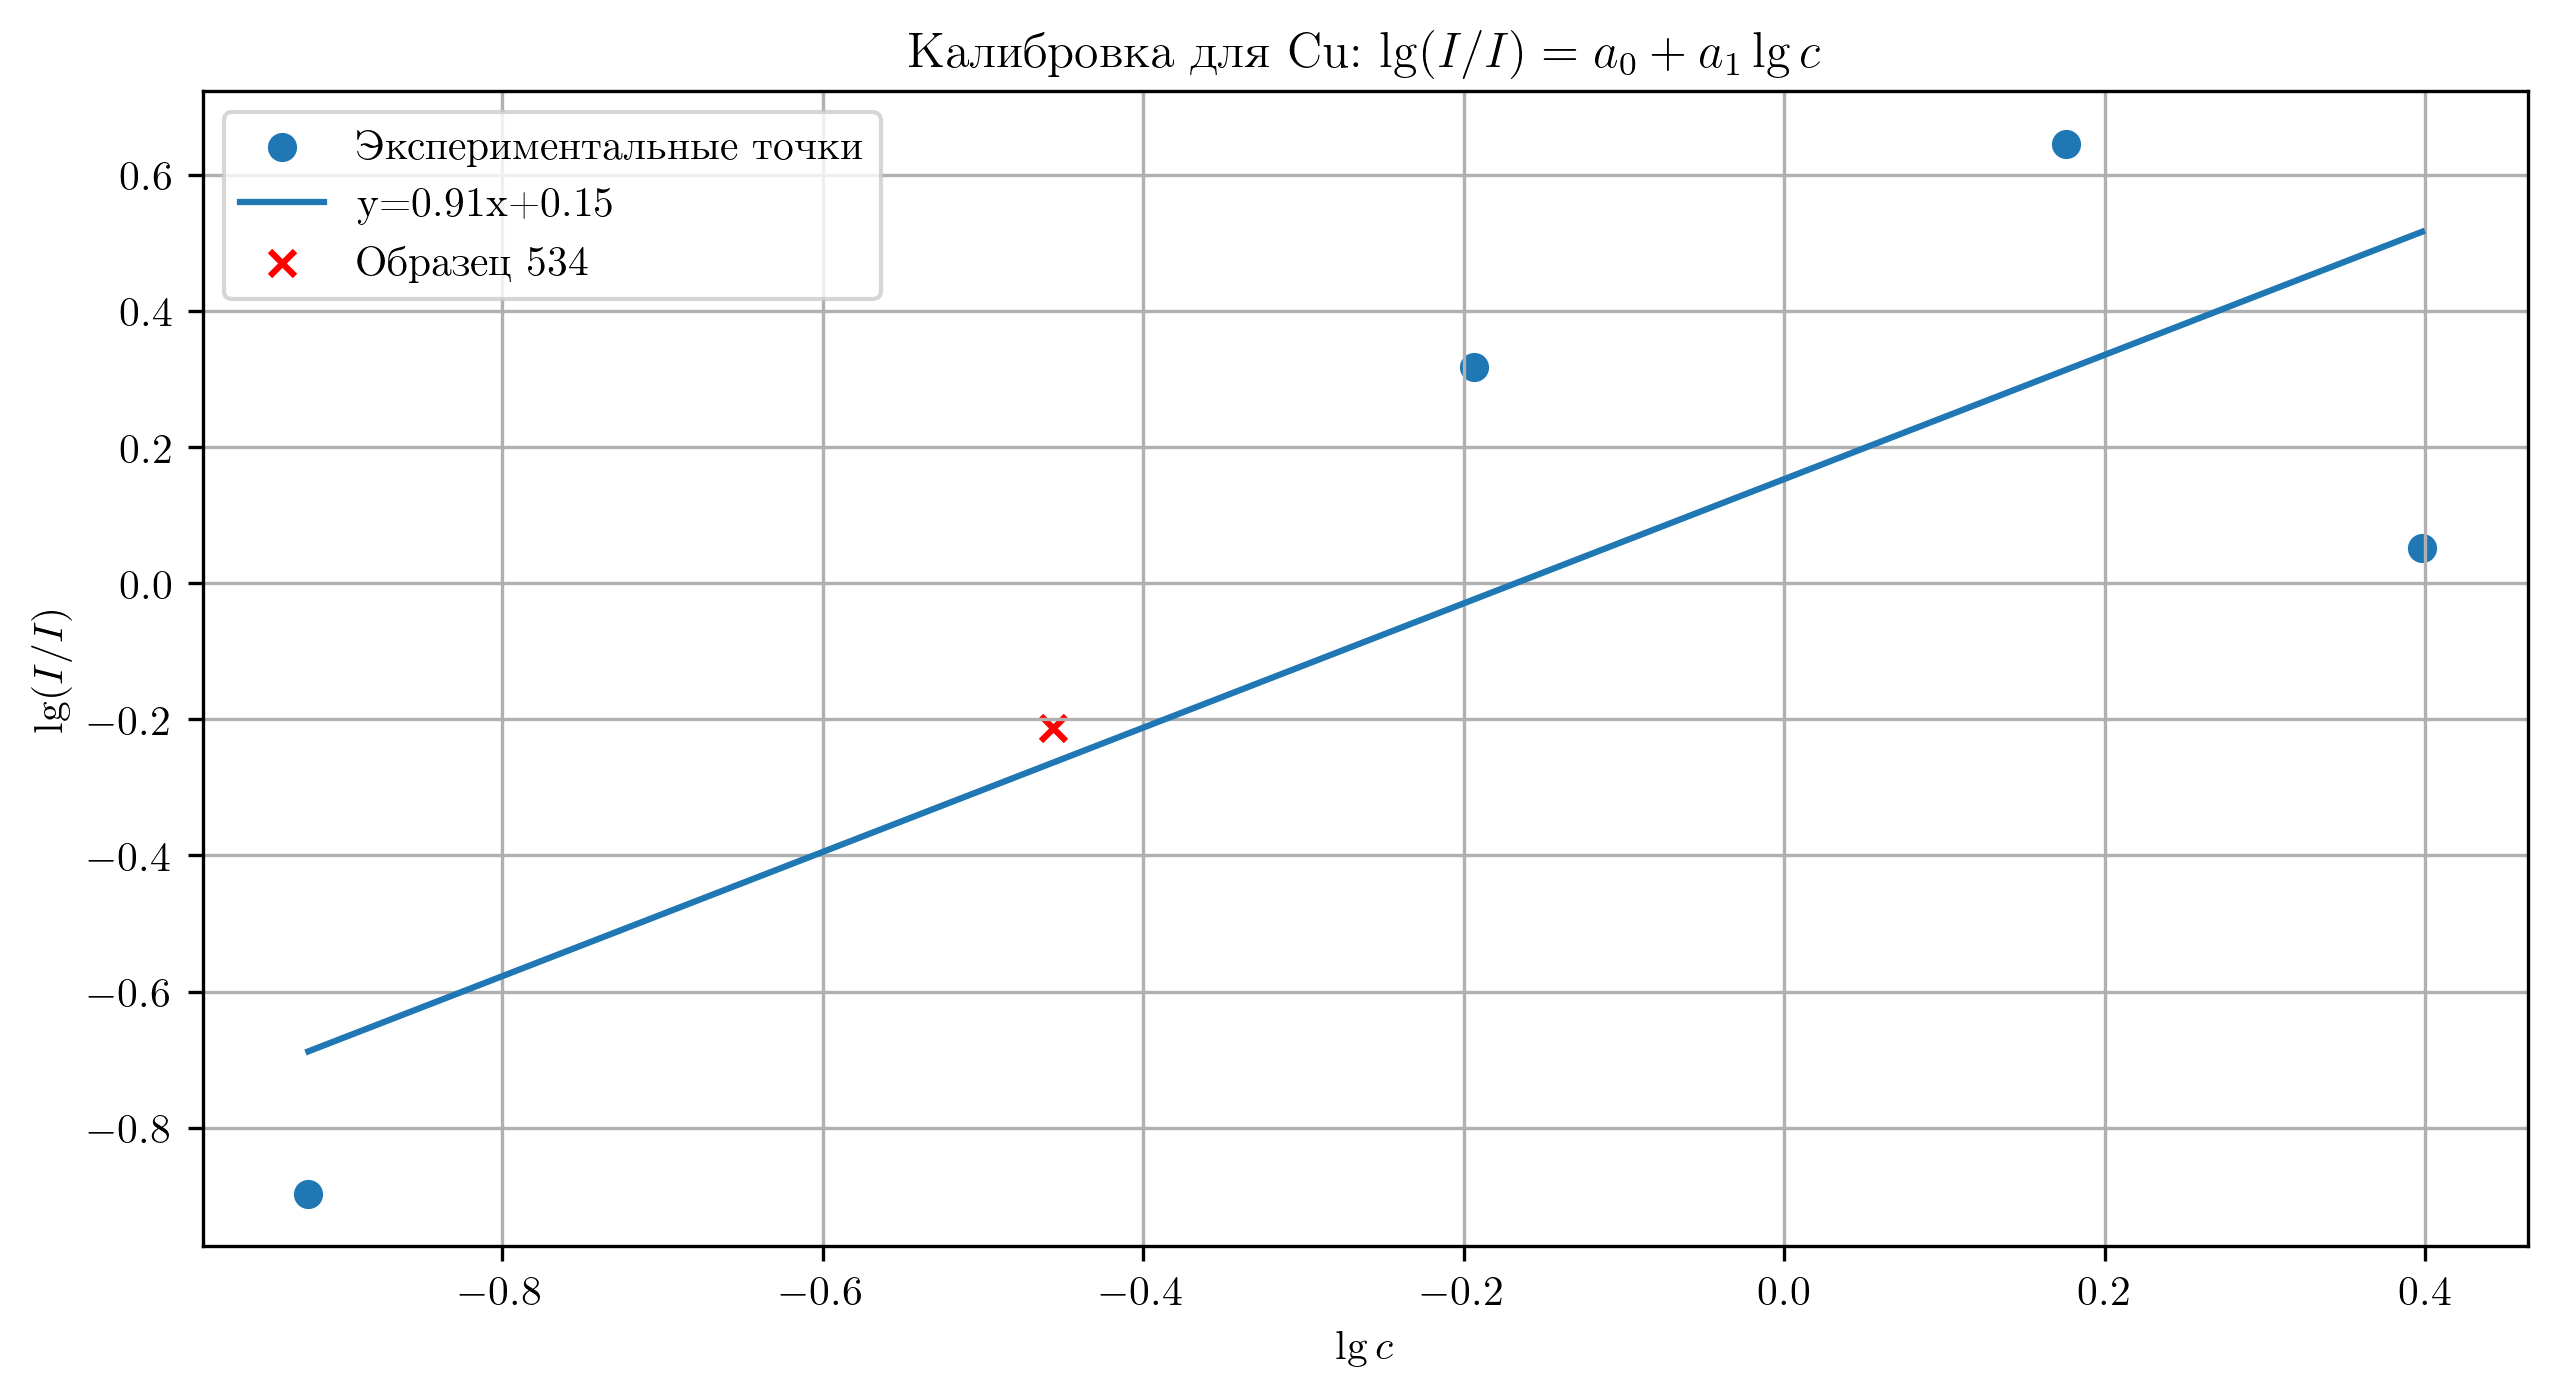

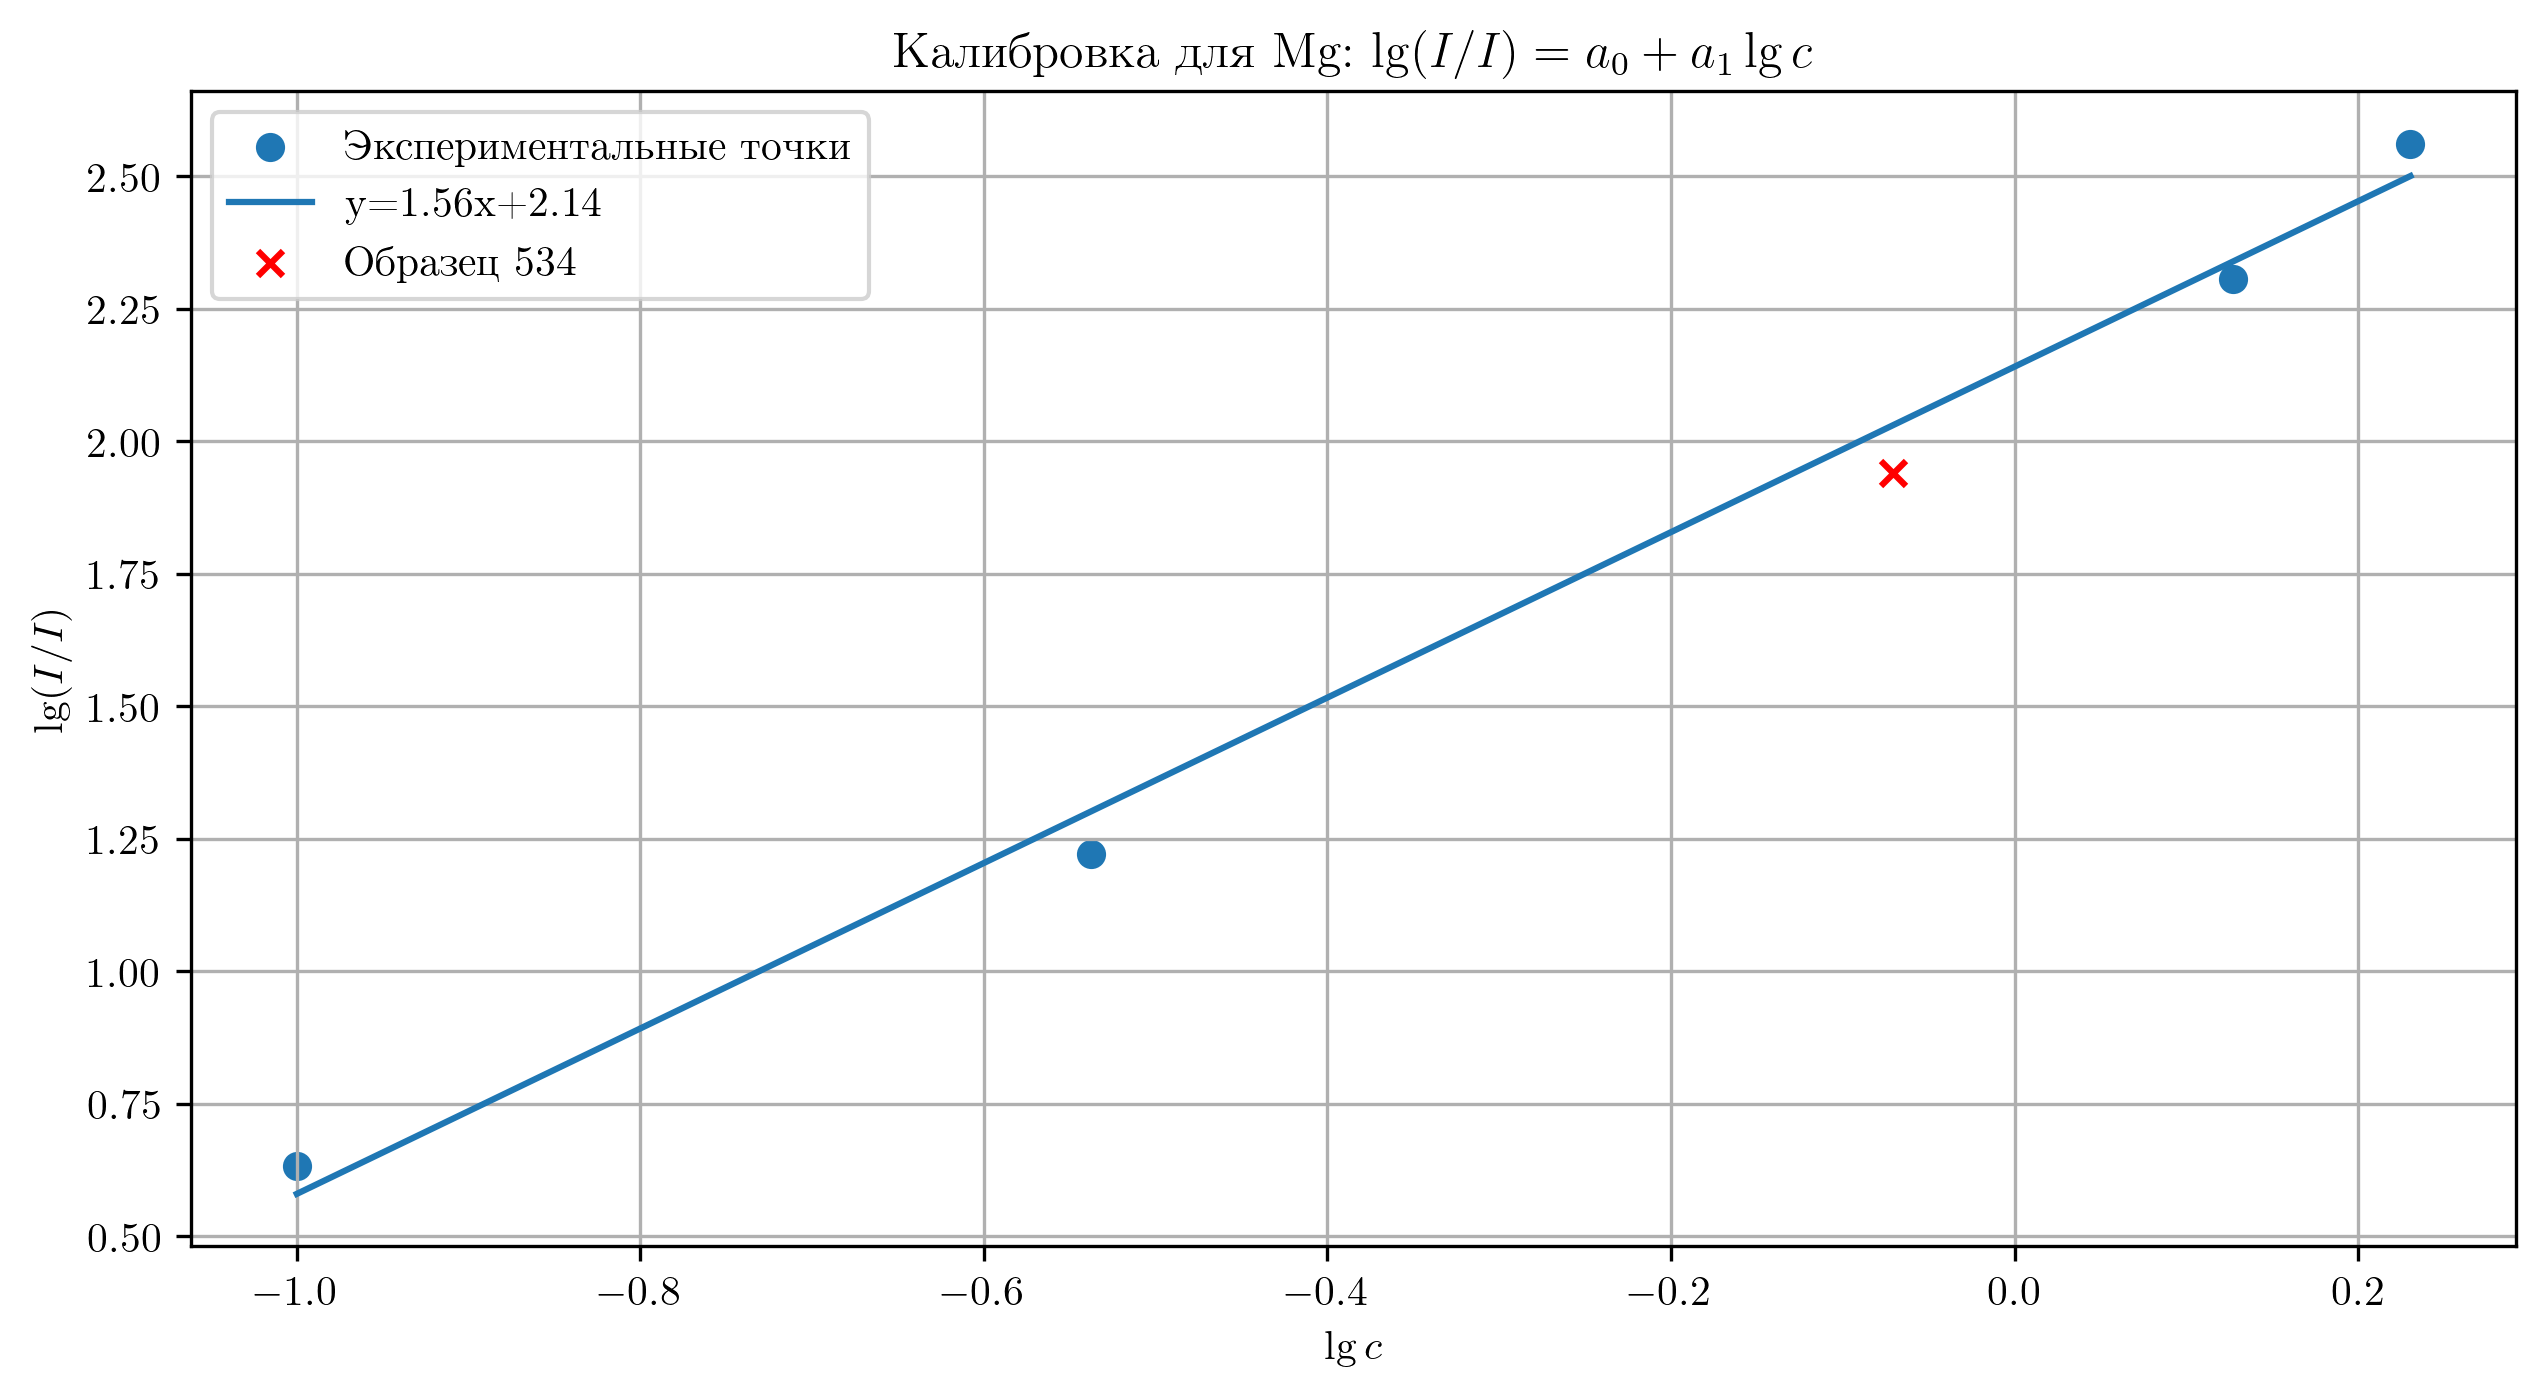

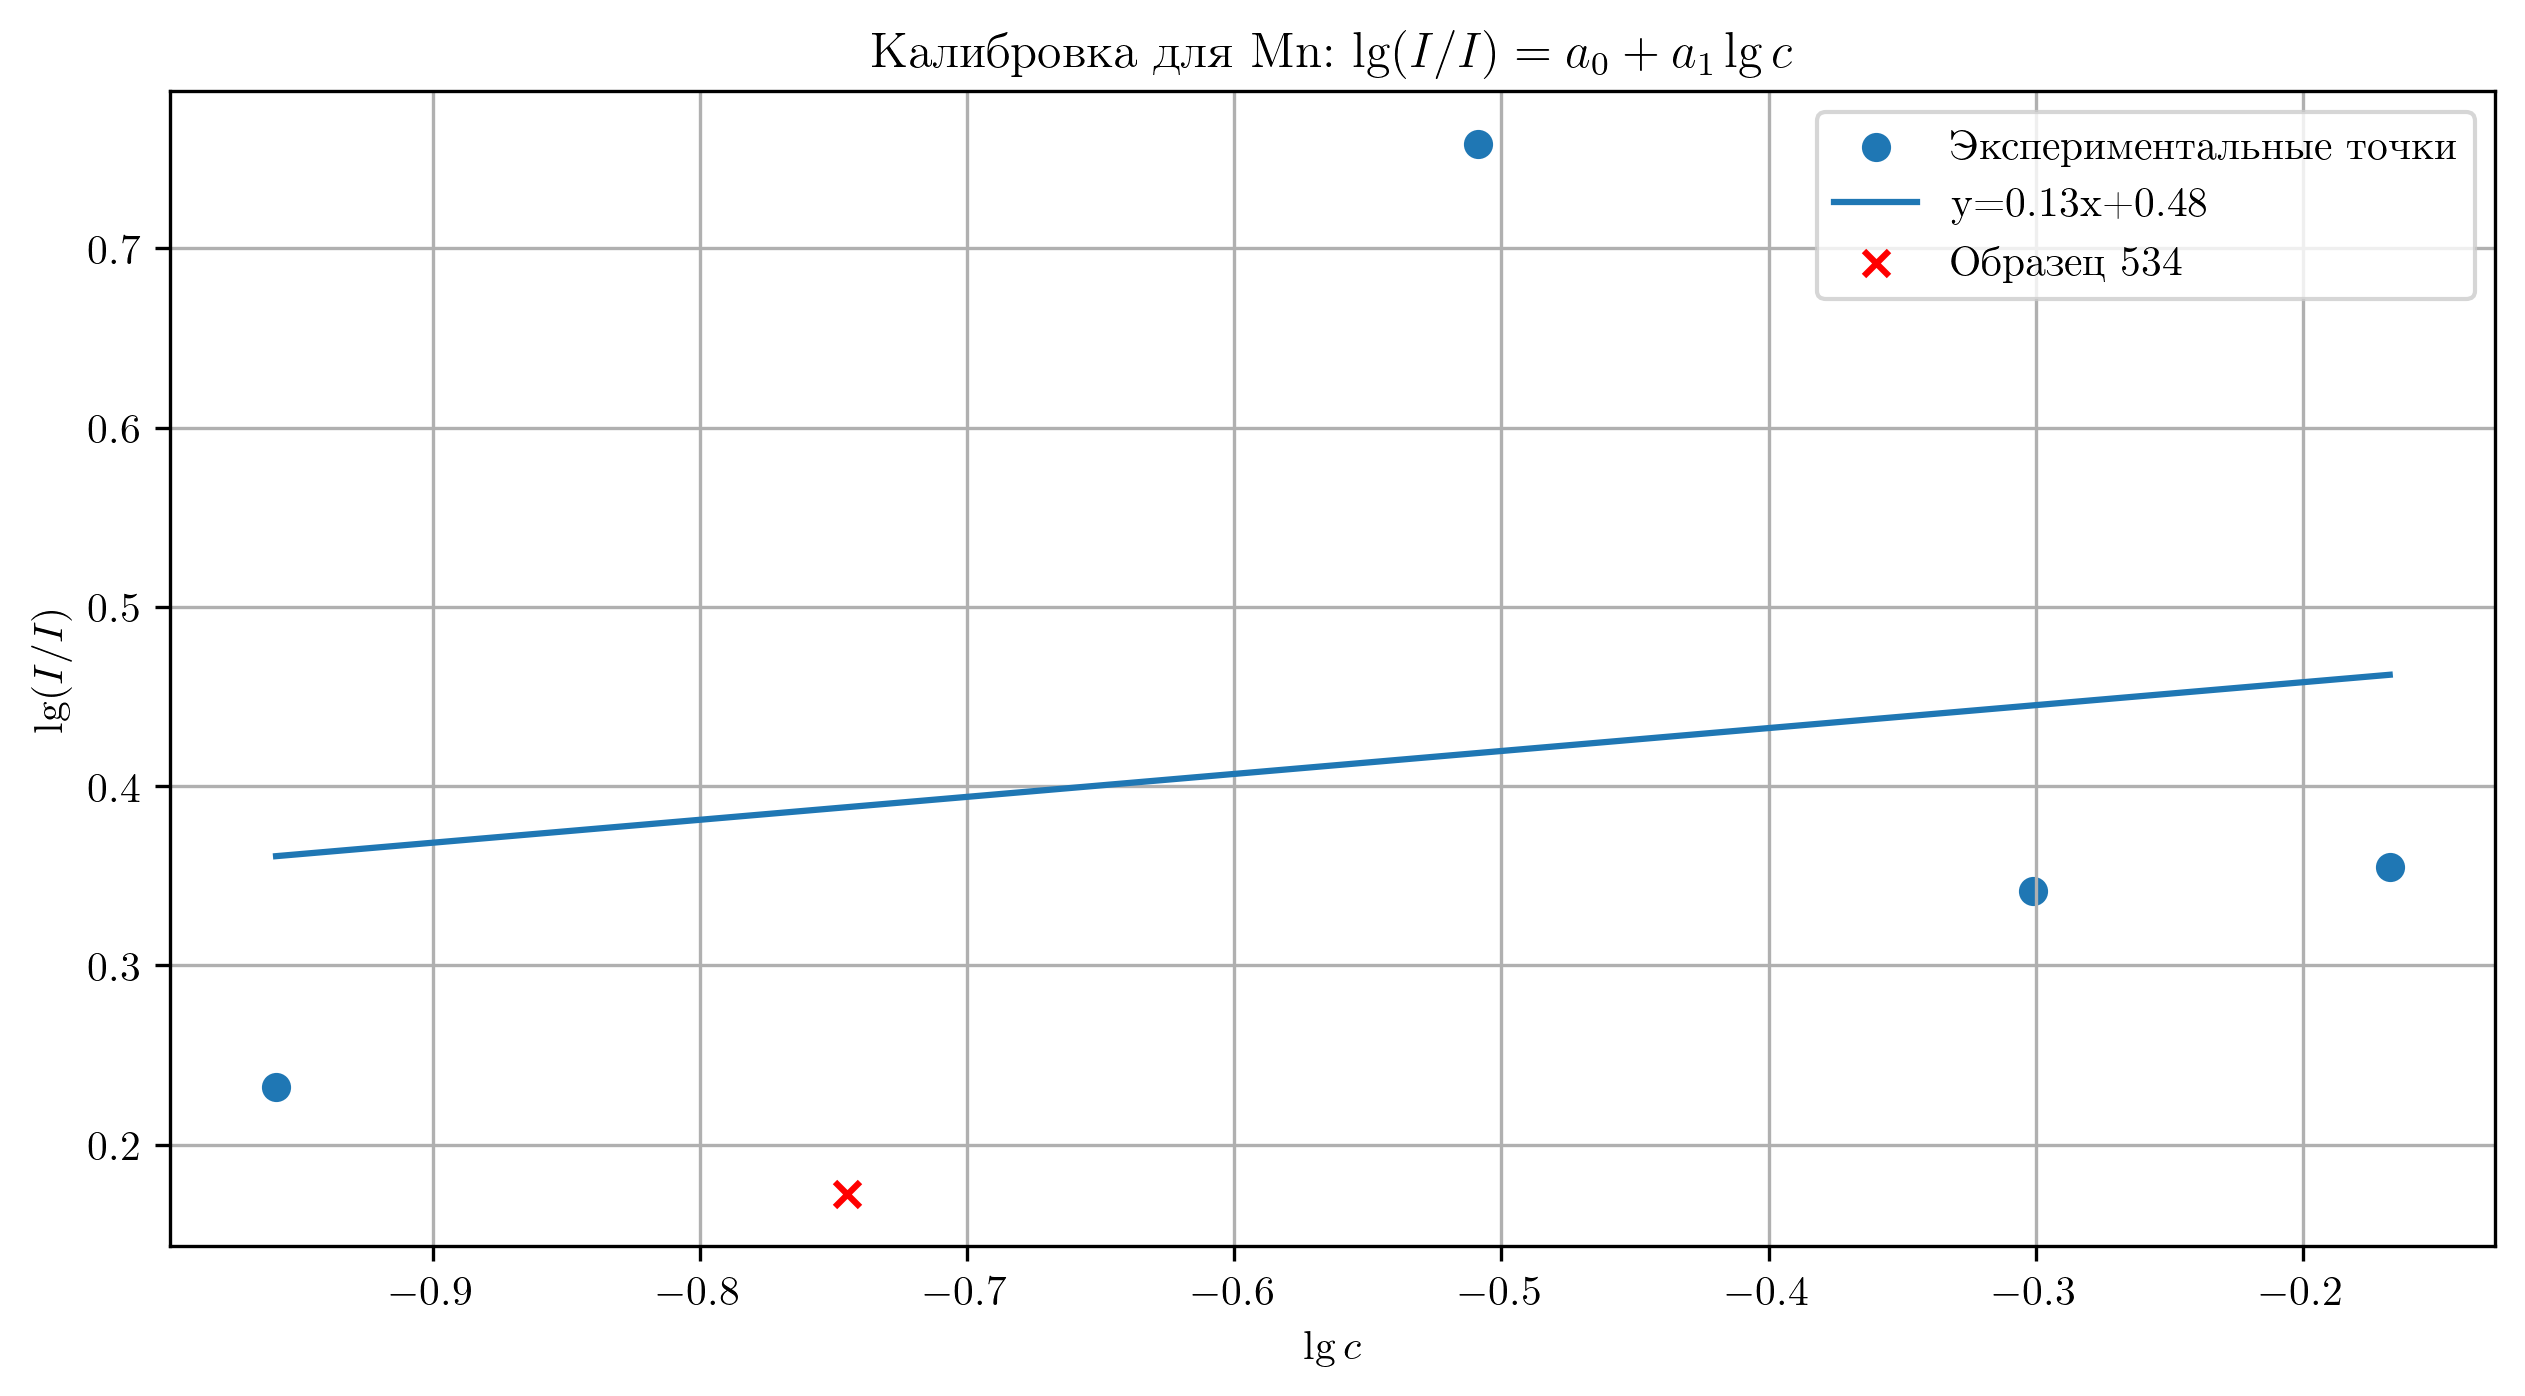

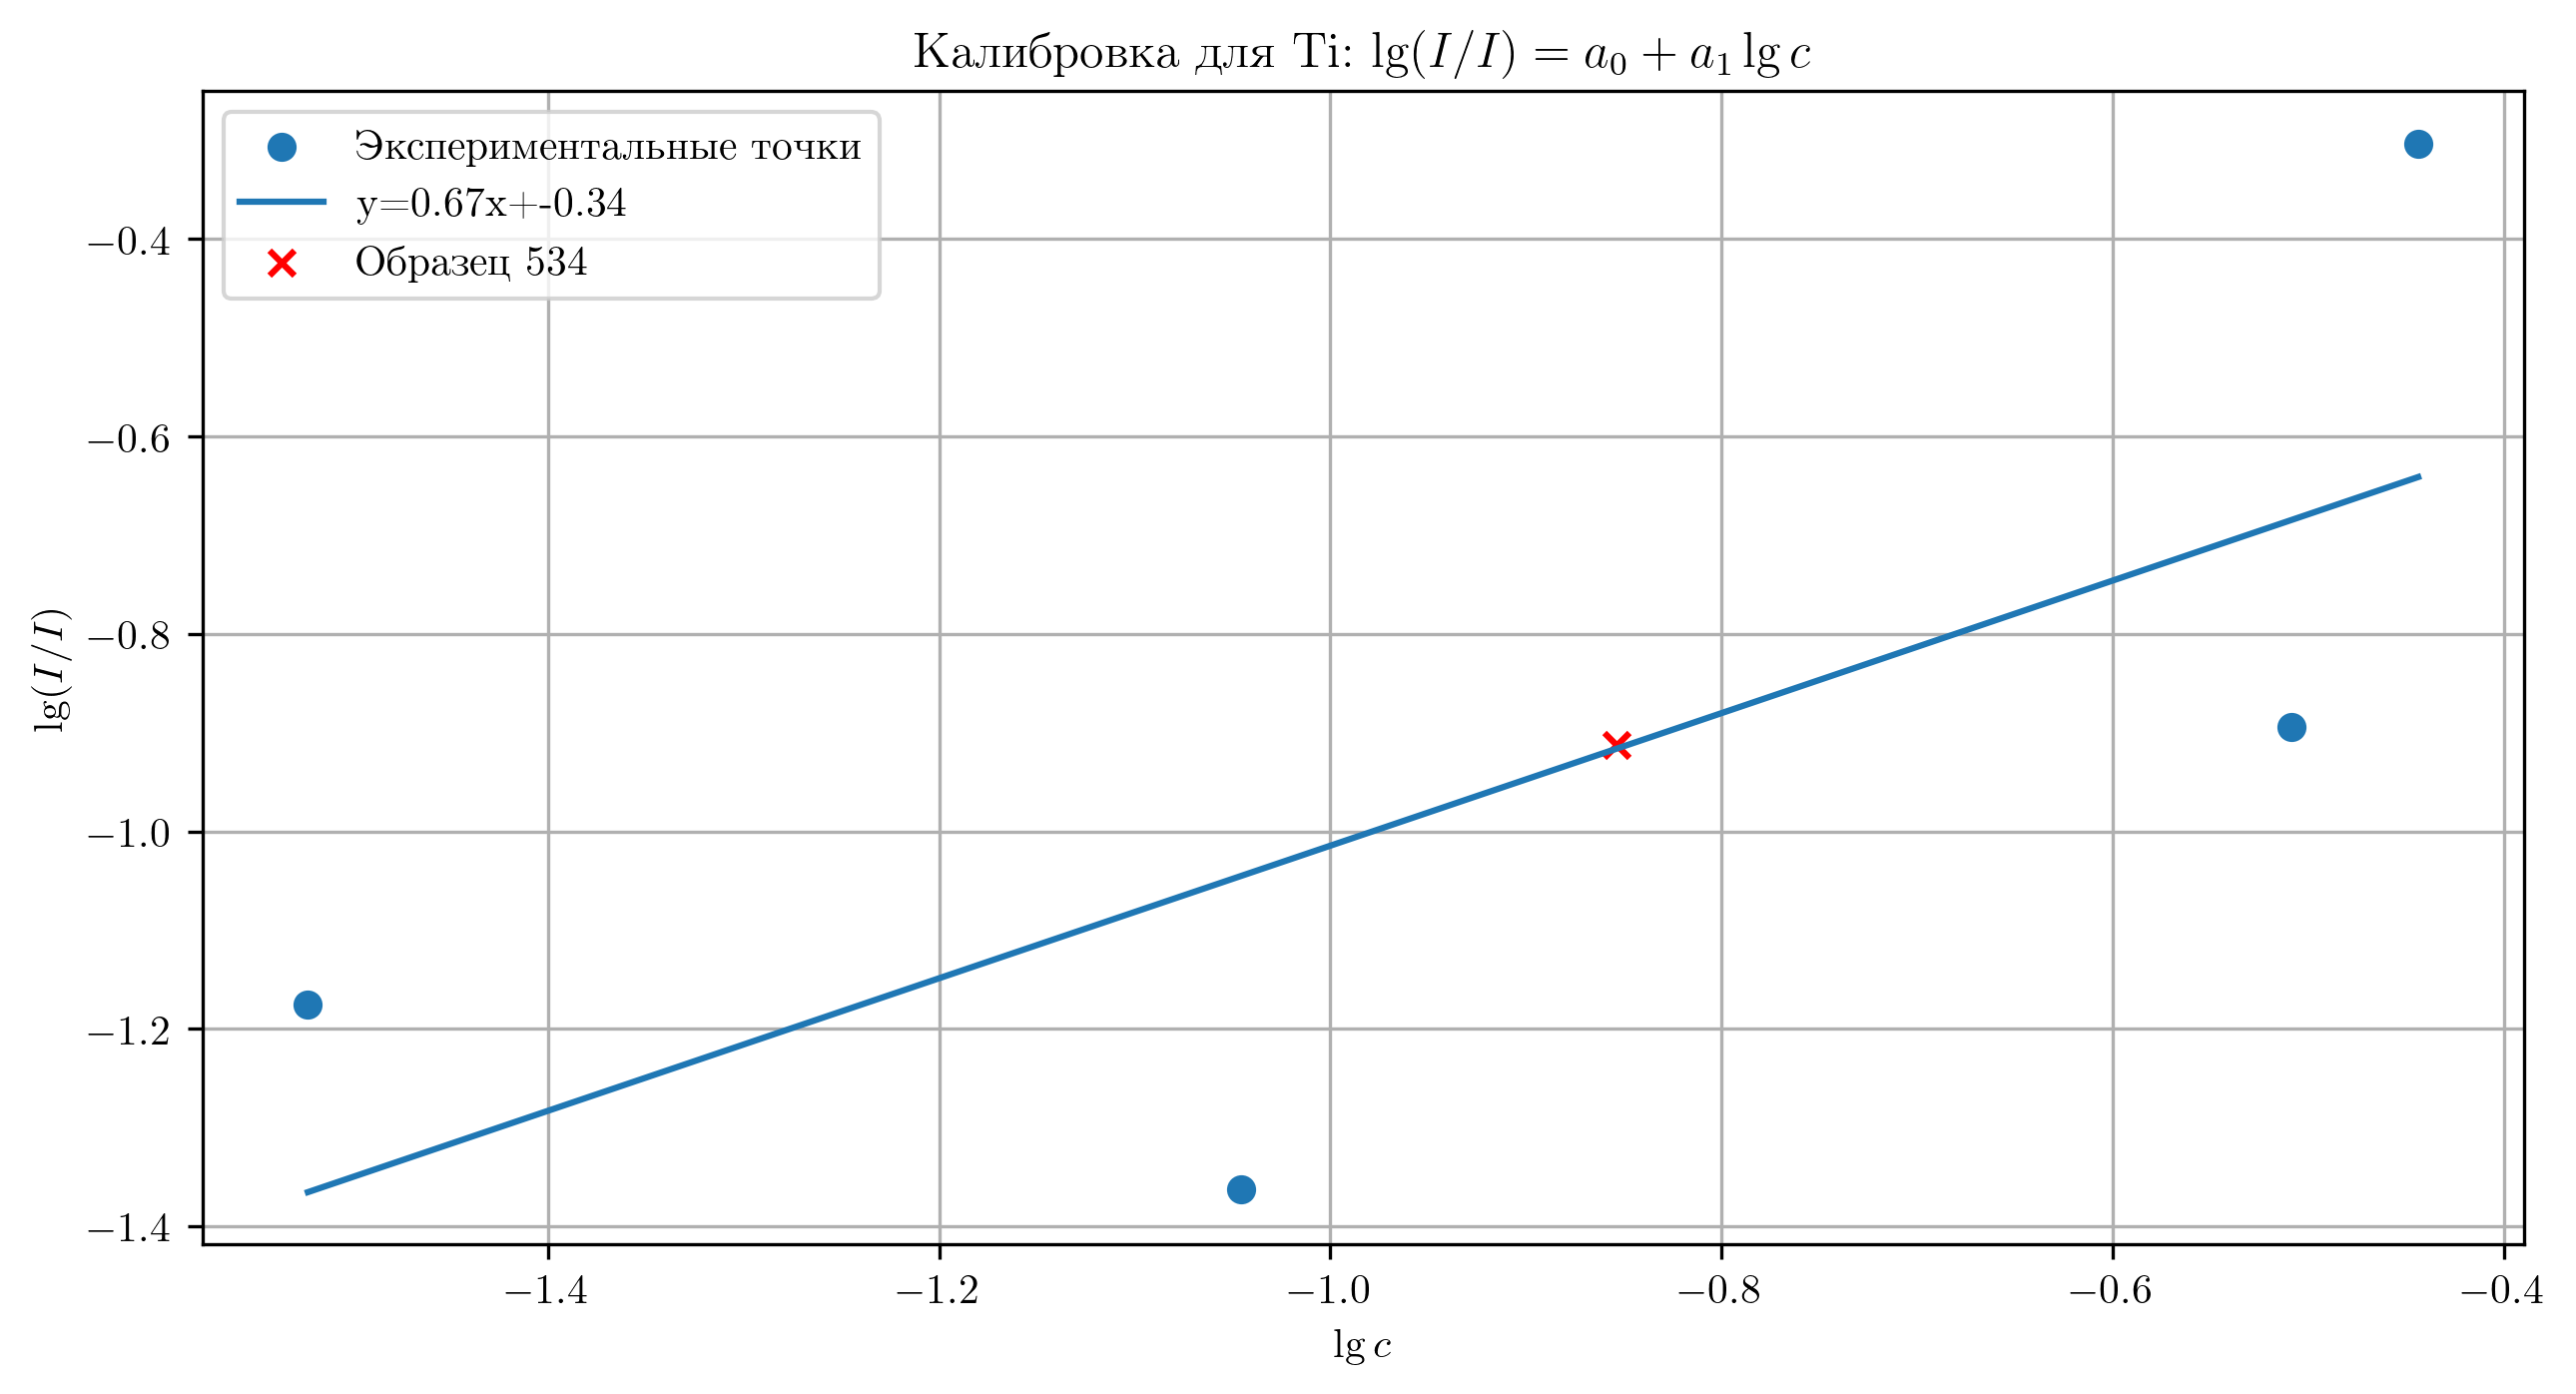

,Element,a0,a1,sigma_y,Conc_pred (%),Conc_act (%),Error_fit (%),Bias (%)
0,Cu,0.1530,0.9132,0.4934,0.3983,0.35,0.2926,0.0483
1,Mg,2.1412,1.5610,0.0840,0.7438,0.85,0.0417,-0.1062
2,Mn,0.4836,0.1279,0.2778,0.0037,0.18,0.0457,-0.1763
3,Ti,-0.3432,0.6713,0.3842,0.1421,0.14,0.1783,0.0021


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

# Исходные данные
data = {
    'sample': [533, 532, 535, 536, 534],
    'Cu_int': [ (4.122+3.916)/2, (46.427+46.258+45.872)/3, (21.022+20.037+19.792)/3, (38.582+39.055+39.101)/3, (10.822+10.225+10.521)/3 ],
    'Fe_int': [ (30.201+33.244)/2, (39.465+41.306+42.225)/3, (10.297+9.894+9.050)/3, (9.207+8.423+8.772)/3, (17.987+17.428+16.022)/3 ],
    'Mg_int': [ (558.280+497.918)/2, (177.413+167.742+183.524)/3, (1881.520+2027.226+2012.368)/3, (3159.392+3198.228+3262.274)/3, (1532.293+1397.788+1554.969)/3 ],
    'Mn_int': [ (67.097+72.176)/2, (91.185+93.953+93.368)/3, (17.164+16.637+16.071)/3, (51.777+49.436+50.135)/3, (26.040+25.793+24.687)/3 ],
    'Ti_int': [ (1.303+1.447)/2, (4.924+5.159+5.599)/3, (5.269+4.548+4.726)/3, (0.580+0.573+0.609)/3, (2.198+2.154+1.947)/3 ]
}

# Концентрации (mass %)
conc = {
    532: {'Cu':2.5,  'Fe':0.97, 'Mg':0.1,  'Mn':0.68, 'Ti':0.31},
    533: {'Cu':0.12, 'Fe':0.71, 'Mg':0.29, 'Mn':0.5,  'Ti':0.09},
    534: {'Cu':0.35, 'Fe':0.39, 'Mg':0.85, 'Mn':0.18, 'Ti':0.14},
    535: {'Cu':0.64, 'Fe':0.2,  'Mg':1.34, 'Mn':0.11, 'Ti':0.36},
    536: {'Cu':1.5,  'Fe':0.13, 'Mg':1.7,  'Mn':0.31, 'Ti':0.03}
}

df = pd.DataFrame(data).set_index('sample')
for el in ['Cu','Fe','Mg','Mn','Ti']:
    df[el+'_conc'] = df.index.map(lambda s: conc[s][el])

# Выбор калибровочных образцов (исключаем Fe как внутренний стандарт)
calib = df.loc[[533, 532, 535, 536]]
elements = ['Cu', 'Mg', 'Mn', 'Ti']  # Исключаем Fe

results = []
for el in elements:
    # Рассчитываем логарифмы отношений интенсивностей
    ratio = calib[el+'_int'] / calib['Fe_int']
    log_ratio = np.log10(ratio)
    
    # Логарифмы концентраций
    log_conc = np.log10(calib[el+'_conc'])
    
    # Линейная регрессия
    a1, a0 = np.polyfit(log_conc, log_ratio, 1)
    
    # Остаточная ошибка
    y_pred = a0 + a1*log_conc
    resid = log_ratio - y_pred
    sigma_y = np.sqrt(np.sum(resid**2)/(len(log_conc)-2))
    
    # Предсказание для образца 534
    ratio_534 = df.loc[534, el+'_int'] / df.loc[534, 'Fe_int']
    log_ratio_534 = np.log10(ratio_534)
    log_conc_pred = (log_ratio_534 - a0)/a1
    conc_pred = 10**log_conc_pred
    
    # Погрешность концентрации (через полный дифференциал)
    conc_err = (10**log_conc_pred) * np.sqrt( 
        (sigma_y/a1)**2 + 
        (np.log(10)*sigma_y*(log_ratio_534 - a0)/a1**2)**2 
    )
    
    results.append({
        'Element': el,
        'a0': a0,
        'a1': a1,
        'sigma_y': sigma_y,
        'Conc_pred (%)': conc_pred,
        'Conc_act (%)': conc[534][el],
        'Error_fit (%)': conc_err,
        'Bias (%)': conc_pred - conc[534][el]
    })
    
    # График
    plt.figure(figsize=(10,5), dpi=300)
    plt.scatter(log_conc, log_ratio, label='Экспериментальные точки')
    lin_x = np.linspace(log_conc.min(), log_conc.max(), 100)
    plt.plot(lin_x, a0 + a1*lin_x, label=f'y={a1:.2f}x+{a0:.2f}')
    plt.scatter(np.log10(conc[534][el]), log_ratio_534, 
                marker='x', color='red', label='Образец 534')
    plt.title(f'Калибровка для {el}: $\lg(I_{{ан}}/I_{{ср}}) = a_0 + a_1 \lg c$')
    plt.xlabel('$\lg c$')
    plt.ylabel('$\lg(I_{ан}/I_{ср})$')
    plt.legend()
    plt.grid()
    plt.savefig(f"images/AS_log_{el}.png")
    plt.show()

# Таблица результатов
result_df = pd.DataFrame(results)
from IPython import display 
display.display(result_df.round(4))